<h2 align="center"> Hotels Data Analysis Project<h2>

In [109]:
import pandas as pd

### Data import and exploration

We have 5 csv files

    1.dim_date.csv
    2.fact_bookings.csv
    3.dim_hotels.csv
    4.dim_rooms.csv
    5.dim_agg_booking.csv    

In [2]:
#Loading data into pandas dataframe
fact_bookings = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")
dim_date = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
dim_hotels = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
dim_rooms = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
dim_agg_booking = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")

In [51]:
fact_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [46]:
dim_date.head(1)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend


In [3]:
# How many rows and columns
fact_bookings.shape

(134590, 12)

In [4]:
# How many unique values and count each of them in room_category
fact_bookings["room_category"].value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

<AxesSubplot:>

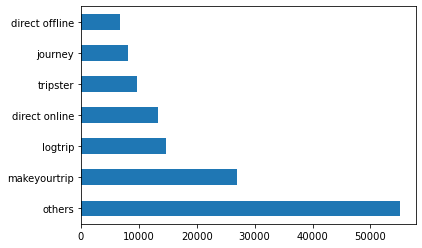

In [5]:
# How many unique booking_platforms I have
fact_bookings["booking_platform"].value_counts().plot(kind = "barh")

In [6]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [7]:
dim_agg_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [8]:
# find out unique property ids in aggregation bookings dataset
dim_agg_booking["property_id"].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [9]:
#find out total_bookings per property_id
dim_agg_booking.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [10]:
# Find out days on which bookingd are greater than capacity
dim_agg_booking[dim_agg_booking["successful_bookings"] > dim_agg_booking["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [11]:
# find out properties that have highst capacity
dim_agg_booking["capacity"].max()

50.0

### Data Cleaning

In [12]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [13]:
fact_bookings.shape

(134590, 12)

In [14]:
# we found that the no_guests is having 12 records are negative values 
fact_bookings = fact_bookings[fact_bookings["no_guests"]>0]
fact_bookings.shape

(134578, 12)

In [15]:
fact_bookings.revenue_generated.min(),fact_bookings.revenue_generated.max()

(6500, 28560000)

In [16]:
avg, std = fact_bookings.revenue_generated.mean(), fact_bookings.revenue_generated.std()

In [17]:
avg, std

(15378.036937686695, 93040.15493143328)

In [18]:
higher_limit = avg + 3*std
lower_limit = avg - 3*std

In [19]:
higher_limit

294498.50173198653

In [20]:
# we found that the revenue_generated is having 5 outliers
fact_bookings = fact_bookings[fact_bookings.revenue_generated<higher_limit]
fact_bookings.shape

(134573, 12)

In [21]:
fact_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [22]:
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [23]:
dim_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [24]:
dim_agg_booking.capacity.fillna(dim_agg_booking.capacity.mean(),inplace = True)

In [25]:
dim_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [26]:
dim_agg_booking[dim_agg_booking.successful_bookings>dim_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# Data Transformation

In [27]:
# occupenct_percentage
dim_agg_booking["OOC_Pct"] = dim_agg_booking["successful_bookings"]/dim_agg_booking["capacity"]
dim_agg_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OOC_Pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [28]:
dim_agg_booking["OOC_Pct"] = dim_agg_booking["OOC_Pct"].apply(lambda x : round(x*100,2))
dim_agg_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OOC_Pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


### 1.What is avg occupancy rate in each of the room category?

In [29]:
dim_rooms.head(2)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite


In [31]:
dim_agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,OOC_Pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33


In [34]:
df_1 = pd.merge(dim_rooms,dim_agg_booking, left_on= "room_id", right_on= "room_category")
df_1.head(2)

,room_id,room_class,property_id,check_in_date,room_category,successful_bookings,capacity,OOC_Pct
0,RT1,Standard,16559,1-May-22,RT1,25,30.0,83.33
1,RT1,Standard,19562,1-May-22,RT1,28,30.0,93.33


In [37]:
df_1.groupby("room_class")["OOC_Pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: OOC_Pct, dtype: float64

In [38]:
# axis = 1 means column drop
# inplace = True means modify data frame
df_1.drop("room_category", axis = 1, inplace = True) 
df_1.head(2)

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct
0,RT1,Standard,16559,1-May-22,25,30.0,83.33
1,RT1,Standard,19562,1-May-22,28,30.0,93.33


### 2.Print average occupancy rate per each city?

In [40]:
dim_hotels.head(1)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi


In [41]:
df_1.head(1)

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct
0,RT1,Standard,16559,1-May-22,25,30.0,83.33


In [44]:
df_2 = pd.merge(df_1,dim_hotels, on = "property_id")
df_2.head(2)

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct,property_name,category,city
0,RT1,Standard,16559,1-May-22,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,RT1,Standard,16559,2-May-22,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [45]:
df_2.groupby("city")["OOC_Pct"].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: OOC_Pct, dtype: float64

 ### 3. When was the occupancy better? Weekdays or weekend?

In [47]:
dim_date.head(1)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend


In [48]:
df_2.head(2)

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct,property_name,category,city
0,RT1,Standard,16559,1-May-22,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,RT1,Standard,16559,2-May-22,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [52]:
df_3 = pd.merge(dim_date,df_2, left_on = "date", right_on= "check_in_date")
df_3.head(2)

,date,mmm yy,week no,day_type,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct,property_name,category,city
0,10-May-22,May 22,W 20,weekeday,RT1,Standard,16559,10-May-22,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai
1,10-May-22,May 22,W 20,weekeday,RT2,Elite,16559,10-May-22,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai


In [54]:
df_3.groupby("day_type")["OOC_Pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: OOC_Pct, dtype: float64

### 4. In the month of june, what is the occupancy for different cities 

In [65]:
df_3["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [68]:
df_june_22 = df_3[df_3["mmm yy"] == 'Jun 22']
df_june_22.head(2)

,date,mmm yy,week no,day_type,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct,property_name,category,city
2200,10-Jun-22,Jun 22,W 24,weekeday,RT1,Standard,16559,10-Jun-22,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai
2201,10-Jun-22,Jun 22,W 24,weekeday,RT2,Elite,16559,10-Jun-22,26,41.0,63.41,Atliq Exotica,Luxury,Mumbai


In [71]:
df_june_22.groupby("city")["OOC_Pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: OOC_Pct, dtype: float64

In [72]:
df_3.columns

Index(['date', 'mmm yy', 'week no', 'day_type', 'room_id', 'room_class',
       'property_id', 'check_in_date', 'successful_bookings', 'capacity',
       'OOC_Pct', 'property_name', 'category', 'city'],
      dtype='object')

In [75]:
new_data_set = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\new_data_august.csv")

In [76]:
new_data_set.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [77]:
new_data_set.shape

(7, 13)

In [78]:
df_3.shape

(6500, 14)

In [83]:
df = pd.concat([df_3,new_data_set],  ignore_index = True, axis = 0)
df.shape

(6507, 16)

### 6. print revenue_realized per city 

In [93]:
dim_hotels.head(1)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi


In [94]:
fact_bookings.head(1)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [95]:
df_6 = pd.merge(dim_hotels,fact_bookings, on = "property_id")


In [97]:
df_6.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

### 7.Print month by month revenue 

In [99]:
df.head(1)

,date,mmm yy,week no,day_type,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,OOC_Pct,property_name,category,city,room_category,occ%
0,10-May-22,May 22,W 20,weekeday,RT1,Standard,16559,10-May-22,18,30.0,60.0,Atliq Exotica,Luxury,Mumbai,NaN,NaN


In [100]:
fact_bookings.head(1)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [101]:
df_7 = pd.merge(df,fact_bookings, on = "property_id")

In [102]:
df_7.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Aug-22       545821635
Jul 22    150351220712
Jun 22    143517074316
May 22    150351220712
Name: revenue_realized, dtype: int64

### Pirnt a pie chart of revenue realized per booking platform 

<AxesSubplot:ylabel='revenue_realized'>

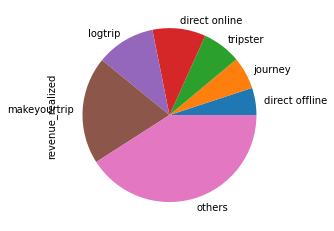

In [110]:
fact_bookings.groupby("booking_platform")["revenue_realized"].sum().sort_values(ascending = True).plot(kind = "pie")